In [276]:
%matplotlib notebook

from modsim import *

In [277]:
m = UNITS.meters
s = UNITS.seconds

In [278]:
condition=Condition(floorheight=3*m,
                   num_floors=1,
                   v_max=.762*m/s,
                   a=.65*m/s**2)

In [279]:
def find_magic_num(v_max, a):
    t = v_max/a
    num_magic=.5*a*t**2+v_max*t
    print(num_magic)
    return num_magic

In [289]:
def make_system(condition):
    unpack(condition)
    height=floorheight*num_floors
    init=State(y=0*m,vy=0*m/s)
    ts=linspace(0,20,401)
    magic_num = find_magic_num(v_max, a)
    return System(magic_num = magic_num, height=height,v_max=v_max, a=a, init=init, ts=ts)

In [290]:
system=make_system(condition)

1.3399476923076923 meter


In [351]:
def slope_func(state, t, system):
    unpack(system)
    y,vy=state
    dydt=vy
    dvdt=a
    if(vy>v_max):
        dvdt=0
    if(y >= height - 1):
        return 0,0
    if(height - y <= magic_num):
        dvdt = -a
    #TODO: Make acceleration reverse at magic time
    return dydt, dvdt

In [352]:
dydt, dvdt = slope_func(system.init, 0, system)
print(dvdt)
print(dydt)

0.65 meter / second ** 2
0.0 meter / second


In [353]:
run_odeint(system, slope_func)

In [354]:
system.results.head

<bound method NDFrame.head of               y        vy
0.00   0.000000  0.000000
0.05   0.000813  0.032500
0.10   0.003250  0.065000
0.15   0.007313  0.097500
0.20   0.013000  0.130000
0.25   0.020313  0.162500
0.30   0.029250  0.195000
0.35   0.039813  0.227500
0.40   0.052000  0.260000
0.45   0.065813  0.292500
0.50   0.081250  0.325000
0.55   0.098313  0.357500
0.60   0.117000  0.390000
0.65   0.137313  0.422500
0.70   0.159250  0.455000
0.75   0.182813  0.487500
0.80   0.208000  0.520000
0.85   0.234813  0.552500
0.90   0.263250  0.585000
0.95   0.293313  0.617500
1.00   0.325000  0.650000
1.05   0.358313  0.682500
1.10   0.393250  0.715000
1.15   0.429813  0.747500
1.20   0.467751  0.762000
1.25   0.505851  0.762000
1.30   0.543951  0.762000
1.35   0.582051  0.762000
1.40   0.620151  0.762000
1.45   0.658251  0.762000
...         ...       ...
18.55  2.000000  0.372441
18.60  2.000000  0.372441
18.65  2.000000  0.372441
18.70  2.000000  0.372441
18.75  2.000000  0.372441
18.80  2

<IPython.core.display.Javascript object>


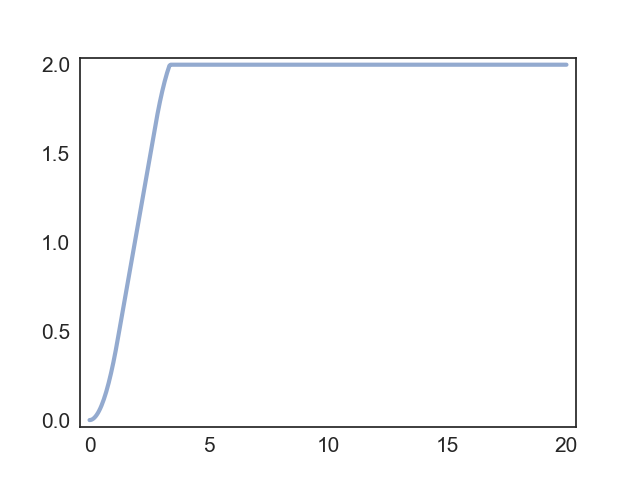

In [355]:
plot(system.results.y)